<a href="https://colab.research.google.com/github/SaiTanooj/Face-Detection-using-CNN/blob/main/facedetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
os.listdir(os.path.join("drive","MyDrive","Colab Notebooks","data2","train"))

['images', 'labels']

[link text](https://)

In [ ]:
os.listdir(os.path.join("drive","MyDrive","Colab Notebooks","data2","val","images"))

['20240609_095718.jpg',
 '20240609_095717.jpg',
 '20240609_095719.jpg',
 '20240609_095718(0).jpg',
 '20240609_095719(0).jpg',
 '20240609_095723.jpg',
 '20240609_095721.jpg',
 '20240609_095730.jpg',
 '20240609_095736.jpg',
 '20240609_095734.jpg']

In [ ]:
import os
import shutil

# Define source and destination directories
src_dir = os.path.join("drive","MyDrive","Colab Notebooks","data2","train","labels")

dst_dir = os.path.join("drive","MyDrive","Colab Notebooks","data2","val","labels")

# List of image filenames (assume JSON files have the same names but with .json extension)
image_files = [
    '20240609_095718.jpg',
    '20240609_095717.jpg',
    '20240609_095719.jpg',
    '20240609_095718(0).jpg',
    '20240609_095719(0).jpg',
    '20240609_095723.jpg',
    '20240609_095721.jpg',
    '20240609_095730.jpg',
    '20240609_095736.jpg',
    '20240609_095734.jpg'
]

# Convert image filenames to JSON filenames
label_files = [os.path.splitext(file_name)[0] + '.json' for file_name in image_files]

# Create the destination directory if it does not exist
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

# Move each JSON file from the source directory to the destination directory
for file_name in label_files:
    src_file = os.path.join(src_dir, file_name)
    dst_file = os.path.join(dst_dir, file_name)
    if os.path.exists(src_file):
        shutil.move(src_file, dst_file)
        print(f"Moved {src_file} to {dst_file}")
    else:
        print(f"File {src_file} does not exist")

print("File transfer complete.")


File drive/MyDrive/Colab Notebooks/data2/train/labels/20240609_095718.json does not exist
File drive/MyDrive/Colab Notebooks/data2/train/labels/20240609_095717.json does not exist
File drive/MyDrive/Colab Notebooks/data2/train/labels/20240609_095719.json does not exist
File drive/MyDrive/Colab Notebooks/data2/train/labels/20240609_095718(0).json does not exist
File drive/MyDrive/Colab Notebooks/data2/train/labels/20240609_095719(0).json does not exist
File drive/MyDrive/Colab Notebooks/data2/train/labels/20240609_095723.json does not exist
File drive/MyDrive/Colab Notebooks/data2/train/labels/20240609_095721.json does not exist
File drive/MyDrive/Colab Notebooks/data2/train/labels/20240609_095730.json does not exist
File drive/MyDrive/Colab Notebooks/data2/train/labels/20240609_095736.json does not exist
File drive/MyDrive/Colab Notebooks/data2/train/labels/20240609_095734.json does not exist
File transfer complete.


In [ ]:
!pip install albumentations

In [ ]:
import albumentations as alb
import cv2
img=cv2.imread(os.path.join(os.path.join("drive","MyDrive","Colab Notebooks","data2","train","images","20240609_095708.jpg")))
img.shape


(2944, 2208, 3)

In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width=2000, height=2200),
    alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

In [ ]:
import json
with open(os.path.join("drive","MyDrive","Colab Notebooks","data2","train","labels","20240609_095708.json"), 'r') as f:
    label = json.load(f)
label["shapes"][0]["points"]

[[509.17241379310326, 520.2758620689656],
 [1685.034482758621, 2199.586206896552]]

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:
coords


[509.17241379310326, 520.2758620689656, 1685.034482758621, 2199.586206896552]

In [ ]:
import numpy as np
coords=np.divide(coords,[2000,2200,2000,2200])

In [ ]:
coords


array([0.25458621, 0.23648903, 0.84251724, 0.99981191])

In [ ]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [ ]:
augmented.keys()


dict_keys(['image', 'bboxes', 'class_labels'])

In [ ]:
augmented["image"].shape

(2200, 2000, 3)

In [ ]:
augmented["bboxes"]

[(0.16786096551724117, 0.016465317754346013, 0.816936827586207, 1.0)]

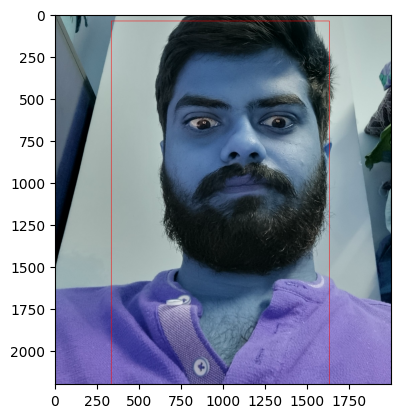

In [ ]:
import matplotlib.pyplot as plt
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [2000,2500]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [2000,2500]).astype(int)),
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [ ]:
for partition in ['train','test','val']:
    for image in os.listdir(os.path.join('drive',"MyDrive","Colab Notebooks","data2", partition, 'images')):
        img = cv2.imread(os.path.join('drive',"MyDrive","Colab Notebooks","data2", partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('drive',"MyDrive","Colab Notebooks","data2", partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [2000,2300,2000,2300]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('drive',"MyDrive","Colab Notebooks","data2",'aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0


                with open(os.path.join('drive',"MyDrive","Colab Notebooks","data2",'aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

Expected x_max for bbox [0.14424137931034478, 0.03880059970014992, 1.0494137931034484, 1.2516941529235384, 'face'] to be in the range [0.0, 1.0], got 1.0494137931034484.
Expected x_max for bbox [0.13044827586206895, 0.034302848575712135, 1.066655172413793, 1.257691154422789, 'face'] to be in the range [0.0, 1.0], got 1.066655172413793.
Expected x_max for bbox [0.0011379310344826763, 0.12875562218890554, 1.0080344827586207, 1.257691154422789, 'face'] to be in the range [0.0, 1.0], got 1.0080344827586207.
Expected x_max for bbox [0.16665517241379302, 0.034302848575712135, 1.1011379310344829, 1.2636881559220392, 'face'] to be in the range [0.0, 1.0], got 1.1011379310344829.
Expected y_max for bbox [0.0045862068965516305, 0.07778110944527736, 0.927, 1.2531934032983512, 'face'] to be in the range [0.0, 1.0], got 1.2531934032983512.
Expected x_max for bbox [0.1390689655172414, 0.05079460269865067, 1.0511379310344828, 1.2516941529235384, 'face'] to be in the range [0.0, 1.0], got 1.0511379310

In [ ]:
path=os.path.join(os.path.join("drive","MyDrive","Colab Notebooks","data2"),'aug_data')

In [ ]:
os.listdir(os.path.join("drive","MyDrive","Colab Notebooks","data2",'aug_data',"train","images"))

['20240609_095906(0).20.jpg',
 '20240609_095906(0).21.jpg',
 '20240609_095906(0).22.jpg',
 '20240609_095906(0).23.jpg',
 '20240609_095906(0).24.jpg',
 '20240609_095906(0).25.jpg',
 '20240609_095906(0).26.jpg',
 '20240609_095906(0).27.jpg',
 '20240609_095906(0).28.jpg',
 '20240609_095906(0).29.jpg',
 '20240609_095906(0).30.jpg',
 '20240609_095906(0).31.jpg',
 '20240609_095906(0).32.jpg',
 '20240609_095906(0).33.jpg',
 '20240609_095906(0).34.jpg',
 '20240609_095906(0).35.jpg',
 '20240609_095906(0).36.jpg',
 '20240609_095906(0).37.jpg',
 '20240609_095906(0).38.jpg',
 '20240609_095906(0).39.jpg',
 '20240609_095906(0).40.jpg',
 '20240609_095906(0).41.jpg',
 '20240609_095906(0).42.jpg',
 '20240609_095906(0).43.jpg',
 '20240609_095906(0).44.jpg',
 '20240609_095906(0).45.jpg',
 '20240609_095906(0).46.jpg',
 '20240609_095906(0).47.jpg',
 '20240609_095906(0).48.jpg',
 '20240609_095906(0).49.jpg',
 '20240609_095906(0).50.jpg',
 '20240609_095906(0).51.jpg',
 '20240609_095906(0).52.jpg',
 '20240609

In [ ]:
import os

def count_files_in_directory(directory_path):
    file_count = 0
    for root, dirs, files in os.walk(directory_path):
        file_count += len(files)
    return file_count

# Example usage
directory_path = os.path.join("drive","MyDrive","Colab Notebooks","data2",'aug_data',"train","labels")
file_count = count_files_in_directory(directory_path)
print(f'There are {file_count} files in the directory and its subdirectories.')


There are 1140 files in the directory and its subdirectories.


In [ ]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
import tensorflow as tf

In [ ]:
images = tf.data.Dataset.list_files('drive/MyDrive/Colab Notebooks/data2/aug_data/train/images/*.jpg')



In [ ]:
train_images = tf.data.Dataset.list_files('drive/MyDrive/Colab Notebooks/data2/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)
len(train_images)

1140

In [ ]:
test_images = tf.data.Dataset.list_files('drive/MyDrive/Colab Notebooks/data2/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)
len(test_images)

900

In [ ]:
val_images = tf.data.Dataset.list_files('drive/MyDrive/Colab Notebooks/data2/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)
len(val_images)

540

In [ ]:
train_images.as_numpy_iterator().next()


array([[[0.70762527, 0.6396514 , 0.6697168 ],
        [0.7176471 , 0.6392157 , 0.6745098 ],
        [0.72156864, 0.6431373 , 0.6784314 ],
        ...,
        [0.7575167 , 0.6594775 , 0.58104604],
        [0.7575162 , 0.65947694, 0.58104557],
        [0.74509835, 0.6647057 , 0.5816993 ]],

       [[0.72156864, 0.6431373 , 0.6784314 ],
        [0.7254902 , 0.64705884, 0.68235296],
        [0.7176471 , 0.6392157 , 0.6745098 ],
        ...,
        [0.76143825, 0.66339904, 0.5849676 ],
        [0.7784309 , 0.68039167, 0.6019603 ],
        [0.7490196 , 0.6509804 , 0.57254905]],

       [[0.720915  , 0.64248365, 0.67777777],
        [0.72156864, 0.6431373 , 0.6784314 ],
        [0.7213507 , 0.64291936, 0.6782135 ],
        ...,
        [0.7612209 , 0.66318166, 0.5847503 ],
        [0.77581686, 0.67777765, 0.5993463 ],
        [0.67930293, 0.5936819 , 0.5113289 ]],

       ...,

       [[0.8305016 , 0.4971683 , 0.6108938 ],
        [0.845098  , 0.5117647 , 0.6254902 ],
        [0.8601297 , 0

In [ ]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

In [ ]:
train_labels = tf.data.Dataset.list_files('drive/MyDrive/Colab Notebooks/data2/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
test_labels = tf.data.Dataset.list_files('drive/MyDrive/Colab Notebooks/data2/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
val_labels = tf.data.Dataset.list_files('drive/MyDrive/Colab Notebooks/data2/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
import json
train_labels.as_numpy_iterator().next()


(array([1], dtype=uint8),
 array([0.1925, 0.    , 0.824 , 0.9297], dtype=float16))

In [ ]:
len(train_images),len(train_labels),len(test_images),len(test_labels),len(val_images),len(val_labels)

(1140, 1140, 900, 900, 540, 540)

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [ ]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(5000)
test = test.batch(8)
test = test.prefetch(4)


In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(5000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:

res =train.as_numpy_iterator().next()

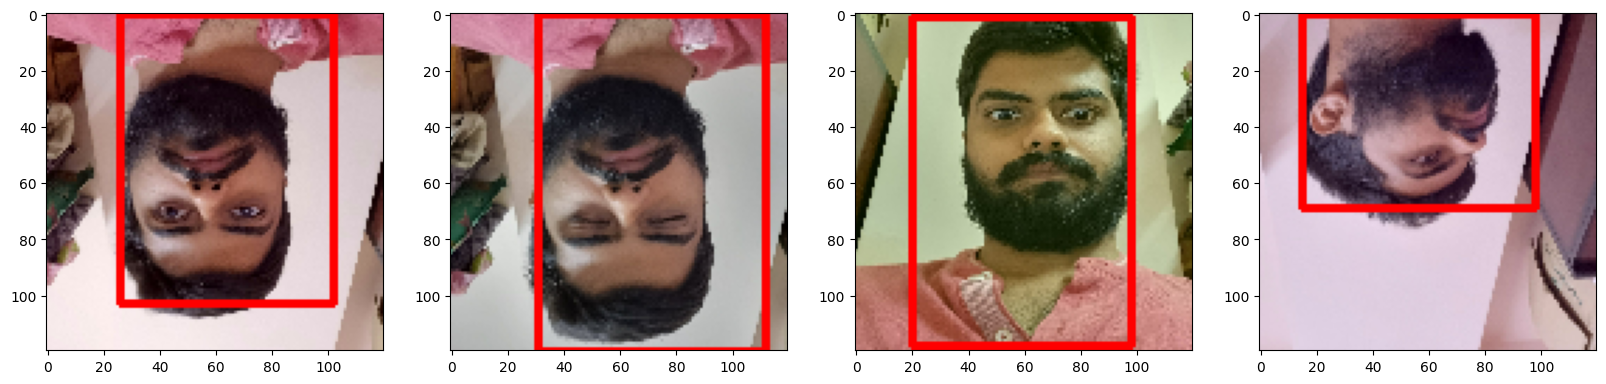

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [ ]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [ ]:
facetracker = build_model()

In [ ]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [ ]:
X, y = train.as_numpy_iterator().next()

In [ ]:

X.shape

(8, 120, 120, 3)

In [ ]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 4s 4s/step


In [ ]:
classes, coords

(array([[0.5905567 ],
        [0.4929557 ],
        [0.38747087],
        [0.47639698],
        [0.4736523 ],
        [0.568273  ],
        [0.4575608 ],
        [0.5856453 ]], dtype=float32),
 array([[0.440812  , 0.48547608, 0.68552357, 0.6882339 ],
        [0.3993344 , 0.42444882, 0.70911694, 0.68469626],
        [0.40143028, 0.49737406, 0.6669514 , 0.52548885],
        [0.38888666, 0.47494987, 0.71180785, 0.62428516],
        [0.41734868, 0.4462953 , 0.6478797 , 0.66894567],
        [0.43773553, 0.38302332, 0.66803885, 0.67581767],
        [0.42283112, 0.45280355, 0.7387318 , 0.6953839 ],
        [0.46659032, 0.4720027 , 0.70269895, 0.69042283]], dtype=float32))

In [ ]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [ ]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [ ]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [ ]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.8443336>

In [ ]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)


In [ ]:
model.compile(opt, classloss, regressloss)

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
143/143 [==============================] - 1419s 10s/step - total_loss: 0.2227 - class_loss: 0.0110 - regress_loss: 0.2172 - val_total_loss: 0.0900 - val_class_loss: 2.7478e-05 - val_regress_loss: 0.0900
Epoch 2/10
143/143 [==============================] - 892s 6s/step - total_loss: 0.0416 - class_loss: 6.4456e-05 - regress_loss: 0.0416 - val_total_loss: 0.0350 - val_class_loss: 3.9041e-06 - val_regress_loss: 0.0350
Epoch 3/10
143/143 [==============================] - 890s 6s/step - total_loss: 0.0318 - class_loss: 2.0354e-05 - regress_loss: 0.0318 - val_total_loss: 0.0282 - val_class_loss: 5.0366e-06 - val_regress_loss: 0.0282
Epoch 4/10
143/143 [==============================] - 889s 6s/step - total_loss: 0.0264 - class_loss: 1.3599e-05 - regress_loss: 0.0264 - val_total_loss: 0.0326 - val_class_loss: 5.0217e-06 - val_regress_loss: 0.0326
Epoch 5/10
143/143 [==============================] - 887s 6s/step - total_loss: 0.0217 - class_loss: 9.6111e-06 - regress_loss: 0.021